# Finite-Difference Methods (python)

- Homesite: https://jonshiach.github.io/files/notes/finite_difference_methods_notes.pdf
- Course: Numerical Methods for Partial Differential Equations II
- Recordings:
  - https://mmutube.mmu.ac.uk/media/PDEs_Chapter_2_Exercises_Q3-7/1_85dac601
  - https://www.youtube.com/playlist?list=PLgPpaTsP_3Dq5KsWd6-8wmjNs3ipnvCU3

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import Derivative as D
from sympy import Eq, Function, Matrix, O, cos, exp, pi, sin, symbols
from tabulate import tabulate

In [2]:
def cleaner(symbolsToDelete: list):
    """
    Helper function that call the garbage collector (clean the symbol's mess).
    """
    try:
        for z0 in symbolsToDelete:
            del globals()[z0]
    except KeyError:
        print("Symbolic variables already cleared")

## 1. Partial Differential Equations

In [3]:
x, y = symbols("x, y")
U = symbols("U", cls=Function)(x, y)
U = x**2 + x * y

In [4]:
U

x**2 + x*y

In [5]:
U_x = D(U, x).simplify()

In [6]:
U_x

2*x + y

In [7]:
U_y = D(U, y).simplify()

In [8]:
U_y

x

In [9]:
cleaner(["x", "y"])

### Example $1$

Page 3

In [10]:
t, x, k, L = symbols("t, x, k, L")
U = symbols("U", cls=Function)(t, x)

heat_equation = Eq(D(U, t), k * D(U, x, 2))

In [11]:
heat_equation

Eq(Derivative(U(t, x), t), k*Derivative(U(t, x), (x, 2)))

#### Analytical solution

In [12]:
heat_solution = 2 * sin(pi * x / L) * exp(-k * pi**2 * t / L**2)

In [13]:
heat_solution

2*exp(-pi**2*k*t/L**2)*sin(pi*x/L)

#### Initial condition

In [14]:
U_0 = heat_solution.subs({t: 0})

In [15]:
U_0

2*sin(pi*x/L)

#### Dirichlet Boundary condition

In [16]:
U_left, U_right = heat_solution.subs({x: 0}), heat_solution.subs({x: L})

In [17]:
U_left

0

In [18]:
U_right

0

#### Checking solution

In [19]:
U_t = heat_equation.lhs.subs({U: heat_solution}).simplify()

In [20]:
U_t

-2*pi**2*k*exp(-pi**2*k*t/L**2)*sin(pi*x/L)/L**2

In [21]:
U_xx = heat_equation.rhs.subs({U: heat_solution}).simplify() / k

In [22]:
U_xx

-2*pi**2*exp(-pi**2*k*t/L**2)*sin(pi*x/L)/L**2

In [23]:
U_t.equals(k * U_xx)

True

### Example $2$

Page 4

In [24]:
cleaner(["t", "x", "k", "L", "U"])

In [25]:
x, y = symbols("x, y")
U = symbols("U", cls=Function)(x, y)

laplace_equation = Eq(D(U, x, 2) + D(U, y, 2), 0)

In [26]:
laplace_equation

Eq(Derivative(U(x, y), (x, 2)) + Derivative(U(x, y), (y, 2)), 0)

In [27]:
t, x, k = symbols("t, x, k")
U = symbols("U", cls=Function)(t, x)
heat_equation = Eq(D(U, t), k * D(U, x, 2))

In [28]:
heat_equation

Eq(Derivative(U(t, x), t), k*Derivative(U(t, x), (x, 2)))

In [29]:
t, x, c = symbols("t, x, c")
U = symbols("U", cls=Function)(t, x)
wave_equation = Eq(D(U, t, 2), c**2 * D(U, x, 2))

In [30]:
wave_equation

Eq(Derivative(U(t, x), (t, 2)), c**2*Derivative(U(t, x), (x, 2)))

In [31]:
cleaner(["t", "x", "k", "c", "L", "U"])

Symbolic variables already cleared


## 2. Finite-Difference Approximations

In [32]:
x = symbols("x")
h = symbols("h", positive=True)
f = Function("f")

### Forward Taylor Series

In [33]:
f(x + h).series(x=h, x0=0, n=5).simplify()

f(x) + h*Derivative(f(x), x) + h**2*Derivative(f(x), (x, 2))/2 + h**3*Derivative(f(x), (x, 3))/6 + h**4*Derivative(f(x), (x, 4))/24 + O(h**5)

### Backward Taylor Series

In [34]:
f(x - h).series(x=h, x0=0, n=5).simplify()

f(x) - h*Derivative(f(x), x) + h**2*Derivative(f(x), (x, 2))/2 - h**3*Derivative(f(x), (x, 3))/6 + h**4*Derivative(f(x), (x, 4))/24 + O(h**5)

### Truncation error

In [35]:
cos(x + h).series(x=h, x0=0, n=2).simplify()

cos(x) - h*sin(x) + O(h**2)

In [36]:
x = 0
h = 0.1
exact = np.cos(x + h)
first_order_approximation = np.cos(x) - h * np.sin(x)
truncation_error = np.abs(exact - first_order_approximation)
E_h = np.abs(-(h**2) / 2 * np.cos(x))

In [37]:
truncation_error

0.0049958347219741794

In [38]:
E_h

0.005000000000000001

In [39]:
error = np.abs(truncation_error - E_h)

In [40]:
error

4.165278025821534e-06

#### Plot

In [41]:
h_list = np.flip(1 / (2 ** np.arange(1, 5)))

In [42]:
h_list

array([0.0625, 0.125 , 0.25  , 0.5   ])

In [43]:
x = 1
error_truncation = np.abs(np.cos(x + h_list) - (np.cos(x) - h_list * np.sin(x)))

In [44]:
error_truncation

array([0.0010207 , 0.00394192, 0.0146122 , 0.04882961])

In [45]:
h_range = np.linspace(start=0, stop=max(h_list))
E_h = np.abs(-1 / 2 * h_range**2 * np.cos(x))

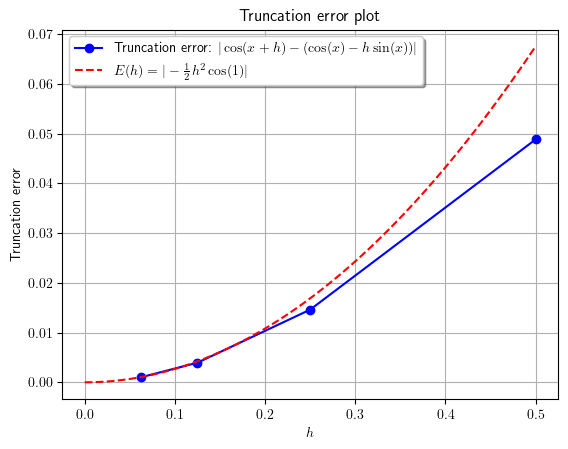

In [46]:
fig, ax = plt.subplots()
ax.plot(
    h_list,
    error_truncation,
    "bo-",
    label=r"Truncation error: $|\cos(x+h) - (\cos(x) - h\sin(x))|$",
)
ax.plot(h_range, E_h, "r--", label=r"$E(h)=|-\frac{1}{2}h^2\cos(1)|$")
ax.set_xlabel(r"$h$")
ax.set_ylabel(r"Truncation error")
ax.set_title("Truncation error plot")
ax.grid()
legend = ax.legend(loc="best", shadow=True)

### Big-oh notation

Page 13

#### Properties of $O\left(h^{n}\right)$

In [47]:
h = symbols("h")
m, n, k = (5, 2, -2)
assert m > n
k * O(h**n) == O(h**n)

True

In [48]:
O(h**m) + O(h**n) == O(h**n)

True

In [49]:
m, n = (2, 5)
assert m < n
O(h**n) / h**m == O(h ** (n - m))

True

In [50]:
O(cos(x))

O(1)

In [51]:
O(sin(x))

O(1)

### Deriving finite-difference approximations

In [52]:
x = symbols("x")
h = symbols("h", positive=True)
f = Function("f")
f(x + h).series(x=h, x0=0, n=2).simplify()

f(x) + h*Derivative(f(x), x) + O(h**2)

In [53]:
f(x - h).series(x=h, x0=0, n=2).simplify()

f(x) - h*Derivative(f(x), x) + O(h**2)

In [54]:
f(x + h).series(x=h, x0=0, n=3).simplify()

f(x) + h*Derivative(f(x), x) + h**2*Derivative(f(x), (x, 2))/2 + O(h**3)

In [55]:
f(x - h).series(x=h, x0=0, n=3).simplify()

f(x) - h*Derivative(f(x), x) + h**2*Derivative(f(x), (x, 2))/2 + O(h**3)

In [56]:
f(x + h).series(x=h, x0=0, n=4).simplify()

f(x) + h*Derivative(f(x), x) + h**2*Derivative(f(x), (x, 2))/2 + h**3*Derivative(f(x), (x, 3))/6 + O(h**4)

In [57]:
f(x - h).series(x=h, x0=0, n=4).simplify()

f(x) - h*Derivative(f(x), x) + h**2*Derivative(f(x), (x, 2))/2 - h**3*Derivative(f(x), (x, 3))/6 + O(h**4)

### Example $3$

In [58]:
cleaner(["x", "h", "f"])

In [59]:
def forward_first_derivative(f: np.ufunc, x_0: float, h: np.array):
    return (f(x_0 + h) - f(x_0)) / h

In [60]:
def backward_first_derivative(f: np.ufunc, x_0: float, h: np.array):
    return (f(x_0) - f(x_0 - h)) / h

In [61]:
def central_first_derivative(f: np.ufunc, x_0: float, h: np.array):
    return (f(x_0 + h) - f(x_0 - h)) / (2 * h)

In [62]:
def central_second_derivative(f: np.ufunc, x_0: float, h: np.array):
    return (f(x_0 + h) - 2 * f(x_0) + f(x_0 - h)) / h**2

In [63]:
f = np.cos
f_prime = lambda x: -np.sin(x)
f_prime_prime = lambda x: -np.cos(x)
x_0 = np.pi / 4
h = np.array(0.1)

In [64]:
ffd = forward_first_derivative(f=f, x_0=x_0, h=h)

In [65]:
ffd

-0.741254745095894

In [66]:
bfd = backward_first_derivative(f=f, x_0=x_0, h=h)

In [67]:
bfd

-0.6706029729039886

In [68]:
cfd = central_first_derivative(f=f, x_0=x_0, h=h)

In [69]:
cfd

-0.7059288589999413

In [70]:
exact_first_derivative = f_prime(x_0)

In [71]:
exact_first_derivative

-0.7071067811865475

In [72]:
error_ffd = np.abs(exact_first_derivative - ffd)

In [73]:
error_ffd

0.03414796390934649

In [74]:
error_bfd = np.abs(exact_first_derivative - bfd)

In [75]:
error_bfd

0.036503808282558836

In [76]:
error_cfd = np.abs(exact_first_derivative - cfd)

In [77]:
error_cfd

0.0011779221866061729

In [78]:
csd = central_second_derivative(f=f, x_0=x_0, h=h)

In [79]:
csd

-0.7065177219190532

In [80]:
exact_second_derivative = f_prime_prime(x_0)

In [81]:
exact_second_derivative

-0.7071067811865476

In [82]:
error_csd = np.abs(exact_second_derivative - csd)

In [83]:
error_csd

0.0005890592674944184

### Estimating the order of an approximation

$$
n\approx
\dfrac{\log\left|E\left(h_{\max}\right)\right| -\log\left|E\left(h_{\min}\right)\right|}{
\log\left(h_{\max}\right)-\log\left(h_{\min}\right)
}.
$$

In [84]:
def estimate_order(h: np.array, truncation_error: np.array) -> float:
    assert h.size == truncation_error.size
    h_max = h.max()
    h_min = h.min()
    Eh_max = truncation_error[np.argmax(h, axis=0)[0]][0]
    Eh_min = truncation_error[np.argmin(h, axis=0)[0]][0]

    return (np.log(np.abs(Eh_max)) - np.log(np.abs(Eh_min))) / (
        np.log(h_max) - np.log(h_min)
    )

### Table 2.1

Finite-difference approximations of the first derivative of
$f\left(x\right)=\cos\left(x\right)$ at $x=\dfrac{\pi}{4}$ using
step lengths $h\in\left\{0.1,0.05,0.25,0.0125\right\}$.

In [85]:
f = np.cos
f_prime = lambda x: -np.sin(x)
x_0 = np.pi / 4
h = 1 / (10 * (2 ** np.arange(4)))[np.newaxis].T
forward = forward_first_derivative(f=f, x_0=x_0, h=h)
backward = backward_first_derivative(f=f, x_0=x_0, h=h)
central = central_first_derivative(f=f, x_0=x_0, h=h)

In [86]:
h

array([[0.1   ],
       [0.05  ],
       [0.025 ],
       [0.0125]])

In [87]:
tabular = np.concatenate((h, forward, backward, central), axis=1)
header = ["h", "Forward", "Backward", "Central"]

In [88]:
print(tabulate(tabular_data=tabular, headers=header))  # TODO: As xarray.

     h    Forward    Backward    Central
------  ---------  ----------  ---------
0.1     -0.741255   -0.670603  -0.705929
0.05    -0.724486   -0.689138  -0.706812
0.025   -0.715872   -0.698195  -0.707033
0.0125  -0.711508   -0.702669  -0.707088


In [95]:
f_prime(x_0)

-0.7071067811865475

### Table 2.2

Truncation errors for the Taylor series approximations of
$\cos\left(1+h\right)$ for $h\in\left\{0.5,0.25,0.125,0.0625\right\}$.

In [98]:
f = lambda h: np.cos(1 + h)
f_prime = lambda h: -np.sin(1 + h)
x_0 = 1
h = 1 / (2 ** np.arange(1, 5))[np.newaxis].T
forward = forward_first_derivative(f=f, x_0=x_0, h=h)
backward = backward_first_derivative(f=f, x_0=x_0, h=h)
central = central_first_derivative(f=f, x_0=x_0, h=h)

In [101]:
h

array([[0.5   ],
       [0.25  ],
       [0.125 ],
       [0.0625]])

In [106]:
error_forward = np.abs(f_prime(x_0) - forward)
error_backward = np.abs(f_prime(x_0) - backward)
error_central = np.abs(f_prime(x_0) - central)

In [107]:
tabular = np.concatenate((h, error_forward, error_backward, error_central), axis=1)
header = ["h", "Forward error", "Backward error", "Central error"]

In [108]:
print(tabulate(tabular_data=tabular, headers=header))

     h    Forward error    Backward error    Central error
------  ---------------  ----------------  ---------------
0.5           0.139304          0.0644706      0.0374166
0.25          0.0611903         0.0423057      0.00944229
0.125         0.0283414         0.0236092      0.00236611
0.0625        0.0135922         0.0124085      0.000591875


In [110]:
estimate_order(h, error_forward)

1.1191270541574243

In [111]:
estimate_order(h, error_backward)

0.7924386666069776

In [109]:
estimate_order(h, error_central)

1.9940809174948577

#### Plot

## Example 4

In [ ]:
h = symbols("h")

In [ ]:
A = Matrix([[1, 1, 1], [0, 1, 2], [0, 1 / 2, 2]])
b = Matrix([0, 1 / h, 0])

In [ ]:
A

In [ ]:
b

In [ ]:
A.solve(b)

## 2.5.6

In [ ]:
N = 11
x, dx = np.linspace(start=0, stop=1, num=N, retstep=True)
v = 1
dt = 0.05
t = 0

In [ ]:
x

In [ ]:
dx

In [ ]:
u = np.exp(-100 * np.power(x - 0.4, 2))

In [ ]:
u

In [ ]:
C = v * dt / dx

In [ ]:
C

In [ ]:
for n in range(3):
    u[0], u[-1] = (0, 0)
    unew = u
    for i in range(1, N):
        unew[i] = u[i] - C * (u[i] - u[i - 1])

    t = t + dt
    u = unew

In [ ]:
unew

In [ ]:
tabular = np.concatenate((x[np.newaxis].T, unew[np.newaxis].T), axis=1)
header = ["i", "u"]

In [ ]:
print(tabulate(tabular_data=tabular, headers=header))